In [2]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=fca6865b13a126786d1137841d09d3ae344e225411e9537881eeb7036dc1efc3
  Stored in directory: c:\users\shivam mohite\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [14]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

od.download("https://www.kaggle.com/datasets/whenamancodes/netflix-prime-video-disney-hulu")

Skipping, found downloaded files in ".\netflix-prime-video-disney-hulu" (use force=True to force download)


In [15]:
df = pd.read_csv("./netflix-prime-video-disney-hulu/tv_shows.csv")

df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


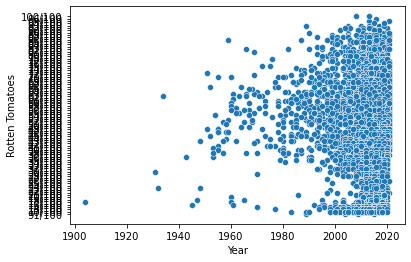

In [26]:
# Is there a linear relationship?
sns.scatterplot(x="Year", y="Rotten Tomatoes", data=df)
plt.show()

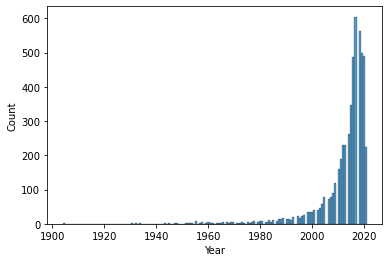

In [24]:
sns.histplot(x="Year", data=df)
plt.show()

In [22]:
class SimpleLinearRegressionModel():
    
    '''
    Implementation of simple linear regression using gradient descent
    @param x (numpy.ndarray) - training set of 'single-feature' inputs
           y (numpy.ndarray) - training set of corresponding targets
           theta (numpy.ndarray) - model parameters in the form of [intercept, coefficient]
           alpha (float) - gradient descent step size
    '''
    def __init__(self, x, y, theta, alpha):
        self.x = x
        self.y = y
        self.theta = theta
        self.alpha = alpha
     
    '''
    Equation for the regression line. 
    input x_i (float) - single input feature
    @return corresponding model output (float)
    '''
    #TODO 
    def h(self, x_i):
        return self.theta[0] + self.theta[1] * x_i
    
    '''
    Renders a plot of the training data and the regression line based on current model parameters.
    ''' 
    def plot_current_model(self):
        reg_line_y = [self.h(x_i) for x_i in self.x]
        plt.scatter(self.x, self.y)
        plt.plot(self.x, reg_line_y, color='green')
        plt.title('Boston Housing')
        plt.xlabel('Average Number of Rooms')
        plt.ylabel('Median Price')
        plt.show()
    
    '''
    Loss function measuring mean squared error of the regression line for a given training set and model parameters. 
    @return MSE based on the current parameters (float)
    '''
    #TODO
    def J(self):
        error = 0
        for i in range(len(self.x)) :
            error = error + (self.h(self.x[i]) - self.y[i]) ** 2
        return (1/(2 * len(self.x))) * error
    
    '''
    Update the model parameters (i.e. the two theta values) for one gradient descent step. Hint: this involves 
    computing partial derivatives. 
    '''
    #TODO
    def gradient_descent_step(self):
        # self.theta = self.theta - self.alpha * np.gradient(self.theta)
        m = len(self.x)
        J0 = 0
        J1 = 0
        
        for i in range(m) :
            J0 = J0 + (self.h(self.x[i]) - self.y[i]) / m
            J1 = J1 + ((self.h(self.x[i]) - self.y[i]) * self.x[i]) / m
            
        self.theta[0] = self.theta[0] - self.alpha * J0
        self.theta[1] = self.theta[1] - self.alpha * J1
        return
        
    '''
    Run gradient descent to optimize the model parameters.
    Keep track of the value of the cost function. You may change the default threshold for convergence.
    @param threshold (float) - run gradient descent until the magnitude of the gradient is below this value. 
    @return a list storing the value of the cost function after every step of gradient descent (float list)
    '''
    #TODO
    def run_gradient_descent(self, threshold=0.001):
        SE = 0
        floatList = []
        while abs(SE - self.J()) >= threshold :
            SE = self.J()
            floatList.append(SE)
            self.gradient_descent_step()
        return floatList

    
    '''
    Renders plot of MSE at each iteration of gradient descent
    @param losses (float list) - MSE after every gradient descent step 
    '''
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

In [48]:
'''
Make predictions for inputs using a trained SLR model. 
@param model (SimpleLinearRegression) - SLR model with (ideally) optimized parameters
       test_x (numpy.ndarray) - inputs to run through the model 
@return corresponding predictions for the inputs (numpy.ndarray)
'''
#TODO
def SLR_predict(model, test_x):
    pred = []
    for i in range(len(test_x)):
        pred.append(model.h(test_x[i]))
    return pred

'''
Renders a plot showing the actual vs SLR-predicted outputs for a set of inputs. 
@param test_x (numpy.ndarray) - model inputs
       test_y (numpy.ndarray) - corresponding actual outputs 
       pred_y (numpy.ndarray) - corresponding predicted outputs
'''
#TODO
def plot_actual_vs_pred(test_x, test_y, pred_y):
    plt.scatter(test_x, test_y)
    plt.scatter(test_x, pred_y)
    plt.title('Release Year vs. Rotten Tomatoes Score')
    plt.xlabel('Release Year')
    plt.ylabel('Rotten Tomatoes Score')
    plt.show()
    return

def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac

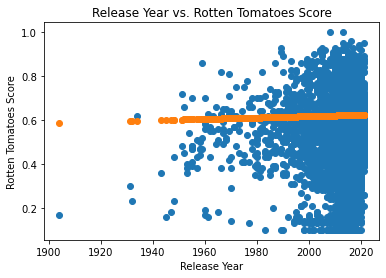

In [49]:
theta = [0, 0.01] 
alpha = .00000001

x = pd.to_numeric(df.loc[:, "Year"])
y = df.loc[:, "Rotten Tomatoes"]
num_y = []

for i in range(len(y)):
    num_y.append(convert_to_float(y[i]))

slr = SimpleLinearRegressionModel(x, num_y, theta, alpha)
losses = slr.run_gradient_descent()
pred_y = SLR_predict(slr, x)
plot_actual_vs_pred(x, num_y, pred_y)